# API

- Application programming interface

In [2]:
from dotenv import load_dotenv
import os, requests
import pandas as pd


load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}'
    data = requests.get(url).json()
    stock_list.append(data)





In [3]:
len(stock_list)

4

In [4]:
stock_list[0].keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [5]:
# datetime1: dict
# datetime2: dict
pd.DataFrame(stock_list[0]["Time Series (5min)"]).T.head()

,1. open,2. high,3. low,4. close,5. volume
2022-11-07 20:00:00,139.5000,139.5600,139.4700,139.5400,13912
2022-11-07 19:55:00,139.4500,139.5300,139.4201,139.5300,2975
2022-11-07 19:50:00,139.4500,139.5000,139.4500,139.5000,7016
2022-11-07 19:45:00,139.3300,139.4900,139.3100,139.4300,6821
2022-11-07 19:40:00,139.3900,139.3900,139.3000,139.3300,5415


In [6]:
load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=60min&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (60min)"]).T
    stock_list.append(df)


KeyError: 'Time Series (60min)'

In [7]:
df.columns

NameError: name 'df' is not defined

In [8]:
load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"
    url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=60min&apikey={api_key}'
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (60min)"]).T
    series = df["4. close"].rename(symbol).astype(float)
    stock_list.append(series)

In [9]:
print(f"{len(stock_list) = }")

len(stock_list) = 4


In [10]:
# concatenated a list of series in
stocks = pd.concat(stock_list, axis = "columns")
stocks


,AAPL,NVDA,TSLA,IBM
2022-11-07 20:00:00,139.5400,143.90,197.30,NaN
2022-11-07 19:00:00,139.0400,143.06,196.73,138.70
2022-11-07 18:00:00,138.8601,142.93,197.18,NaN
2022-11-07 17:00:00,138.9200,143.00,197.58,138.34
2022-11-07 16:00:00,138.9600,143.03,197.06,138.34
...,...,...,...,...
2022-10-27 12:00:00,NaN,NaN,NaN,135.22
2022-10-27 11:00:00,NaN,NaN,NaN,135.63
2022-10-27 10:00:00,NaN,NaN,NaN,135.40
2022-10-27 09:00:00,NaN,NaN,NaN,135.15


In [11]:
import plotly.express as px

px.line(
    stocks,
    x=stocks.index,
    y=symbols,
    labels={"variable": "Stock", "value": "Value in USD", "index": "Date", "title": "Stocks in one week"},
    title = "Stocks in one week"
)


# Working with time series

In [12]:
print(f"{stocks.index.dtype = }")

stocks.index.dtype = dtype('O')


In [13]:
#print(stocks.index.dtype)

# convert dtype object to datetime
stocks.index = pd.to_datetime(stocks.index)
stocks.index.dtype
stocks.head()

,AAPL,NVDA,TSLA,IBM
2022-11-07 20:00:00,139.5400,143.90,197.30,NaN
2022-11-07 19:00:00,139.0400,143.06,196.73,138.70
2022-11-07 18:00:00,138.8601,142.93,197.18,NaN
2022-11-07 17:00:00,138.9200,143.00,197.58,138.34
2022-11-07 16:00:00,138.9600,143.03,197.06,138.34


In [14]:
stocks.loc["2022-10"] # extracts all rows with date 2022-10

,AAPL,NVDA,TSLA,IBM
2022-10-31 20:00:00,153.2054,134.7000,227.5900,138.3000
2022-10-31 19:00:00,153.0456,134.9700,227.5300,138.3000
2022-10-31 18:00:00,152.9856,135.0000,227.6000,NaN
2022-10-31 17:00:00,153.1455,135.1700,227.6500,138.2900
2022-10-31 16:00:00,153.1954,135.0000,227.5500,138.3300
2022-10-31 15:00:00,153.3451,135.5800,228.7000,138.3250
2022-10-31 14:00:00,153.4749,135.8300,228.9600,138.4100
2022-10-31 13:00:00,153.3351,134.8450,226.7600,137.7900
2022-10-31 12:00:00,153.0257,135.1199,227.0650,137.9750
2022-10-31 11:00:00,152.4366,133.6700,224.3400,137.1950


In [15]:
stocks.sort_index().loc["2022-10-27":"2022-10-31"]

,AAPL,NVDA,TSLA,IBM
2022-10-27 07:00:00,NaN,NaN,NaN,135.0100
2022-10-27 09:00:00,NaN,NaN,NaN,135.1500
2022-10-27 10:00:00,NaN,NaN,NaN,135.4000
2022-10-27 11:00:00,NaN,NaN,NaN,135.6300
2022-10-27 12:00:00,NaN,NaN,NaN,135.2200
2022-10-27 13:00:00,NaN,NaN,NaN,135.4200
2022-10-27 14:00:00,NaN,NaN,NaN,134.6400
2022-10-27 15:00:00,NaN,NaN,NaN,134.7100
2022-10-27 16:00:00,NaN,NaN,NaN,134.9100
2022-10-27 17:00:00,NaN,NaN,NaN,134.5200


In [16]:
from datetime import datetime, timedelta
now = datetime.now()
last_week = ((now - timedelta(7)).strftime("%Y-%m-%d"))
now = str(now.date())

print(f"{last_week = }")
print(f"{now = }")

stocks.sort_index().loc[last_week:now]


last_week = '2022-11-01'
now = '2022-11-08'


,AAPL,NVDA,TSLA,IBM
2022-11-01 05:00:00,154.2936,137.38,231.70,138.89
2022-11-01 06:00:00,154.5431,137.27,231.80,139.14
2022-11-01 07:00:00,154.7428,137.54,232.55,NaN
2022-11-01 08:00:00,154.6829,137.54,232.15,NaN
2022-11-01 09:00:00,155.3119,138.15,233.18,139.15
...,...,...,...,...
2022-11-07 16:00:00,138.9600,143.03,197.06,138.34
2022-11-07 17:00:00,138.9200,143.00,197.58,138.34
2022-11-07 18:00:00,138.8601,142.93,197.18,NaN
2022-11-07 19:00:00,139.0400,143.06,196.73,138.70


# Subplots in 2x2 figure

axes.shape = (2, 2)
axes.dtype = dtype('O')
[[<AxesSubplot: > <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: >]]
[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >]
(4,)


Text(0.5, 1.05, 'A few tech stocks')

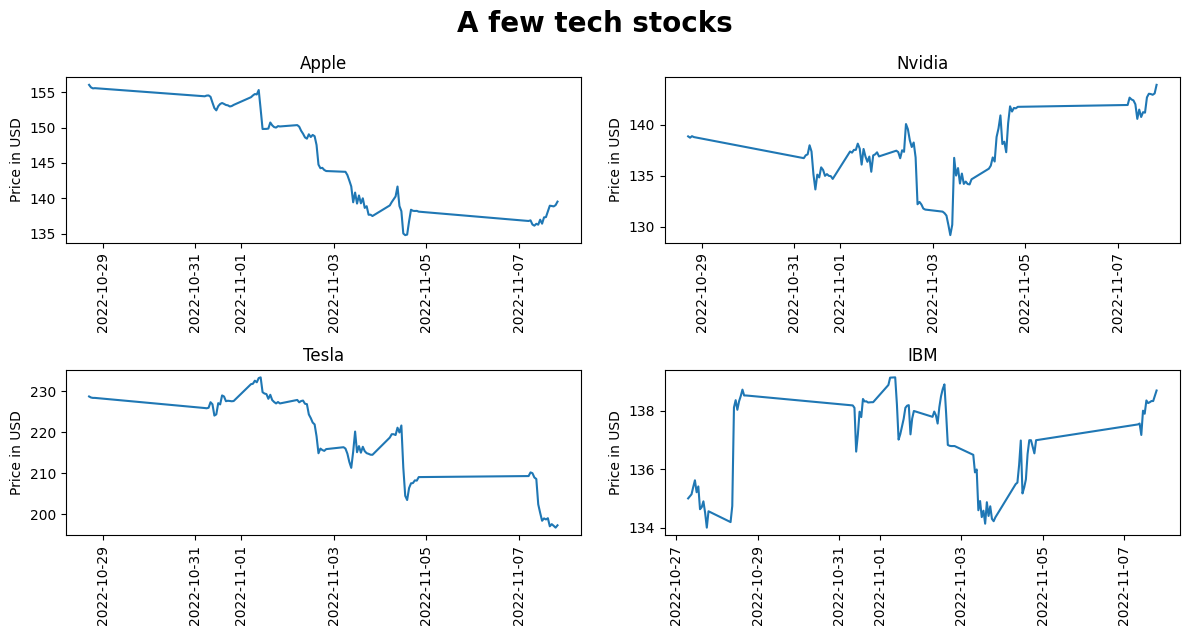

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2, figsize=(12, 6))

print(f"{axes.shape = }")
print(f"{axes.dtype = }")
print(f"{axes}")
print(f"{axes.flatten()}")
print(f"{axes.flatten().shape}")

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia", "TSLA": "Tesla", "IBM": "IBM"}

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data = stocks, x= stocks.index, y = symbol, ax = ax)
    ax.set(title = f"{stock_names[symbol]}", ylabel = "Price in USD")
    ax.tick_params(axis="x", rotation = 90)

fig.tight_layout()
fig.suptitle("A few tech stocks", y = 1.05, fontweight = "bold", fontsize=20)
